# Consigne : 

À partir du projet ci-dessous :
- interpréter systématiquement les indicateurs de performance de l’intelligence artificielle : 
    - Graphiques.
    - Métriques.
    - Généralisation. 
    - Vérification d'absence de data leakage.
    - Choix des methodes d'encodage.
    - Visualiser une learning curve.
    
**Les interprétations concernent le projet existant et les améliorations que vous allez apporter.**

- à partir des éléments d’interprétation, définir les caractéristiques des améliorations à apporter,
- intégrer les améliorations à l'algorithme d’intelligence artificielle (Réaliser au moins 2 itérations de plus),
- communiquer une estimation de charge au regard du besoin d’évolution de l’application
    - le livrable peut être, par exemple : un notebook, un excel, ou power point.
- intégrer l’évolution fonctionnelle (réaliser au minimum une API à partir de ce projet).
- tester la non régression de l’application suite à l’intégration de l’évolution
    - implémenter au moins 3 tests unitaires.
    - Assurez vous de gérer les erreurs d'entrée utilisateurs : 
        - exemple : que ce passe t-il si l'utilisateur rentre une chaine de caractère (string) alors que le modèle attend un entier (integer).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Récupération de la donnée

In [43]:
data = pd.read_csv('data/ds_salaries.csv', index_col=0)

In [44]:
data.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S


**Définitions des colonnes :**



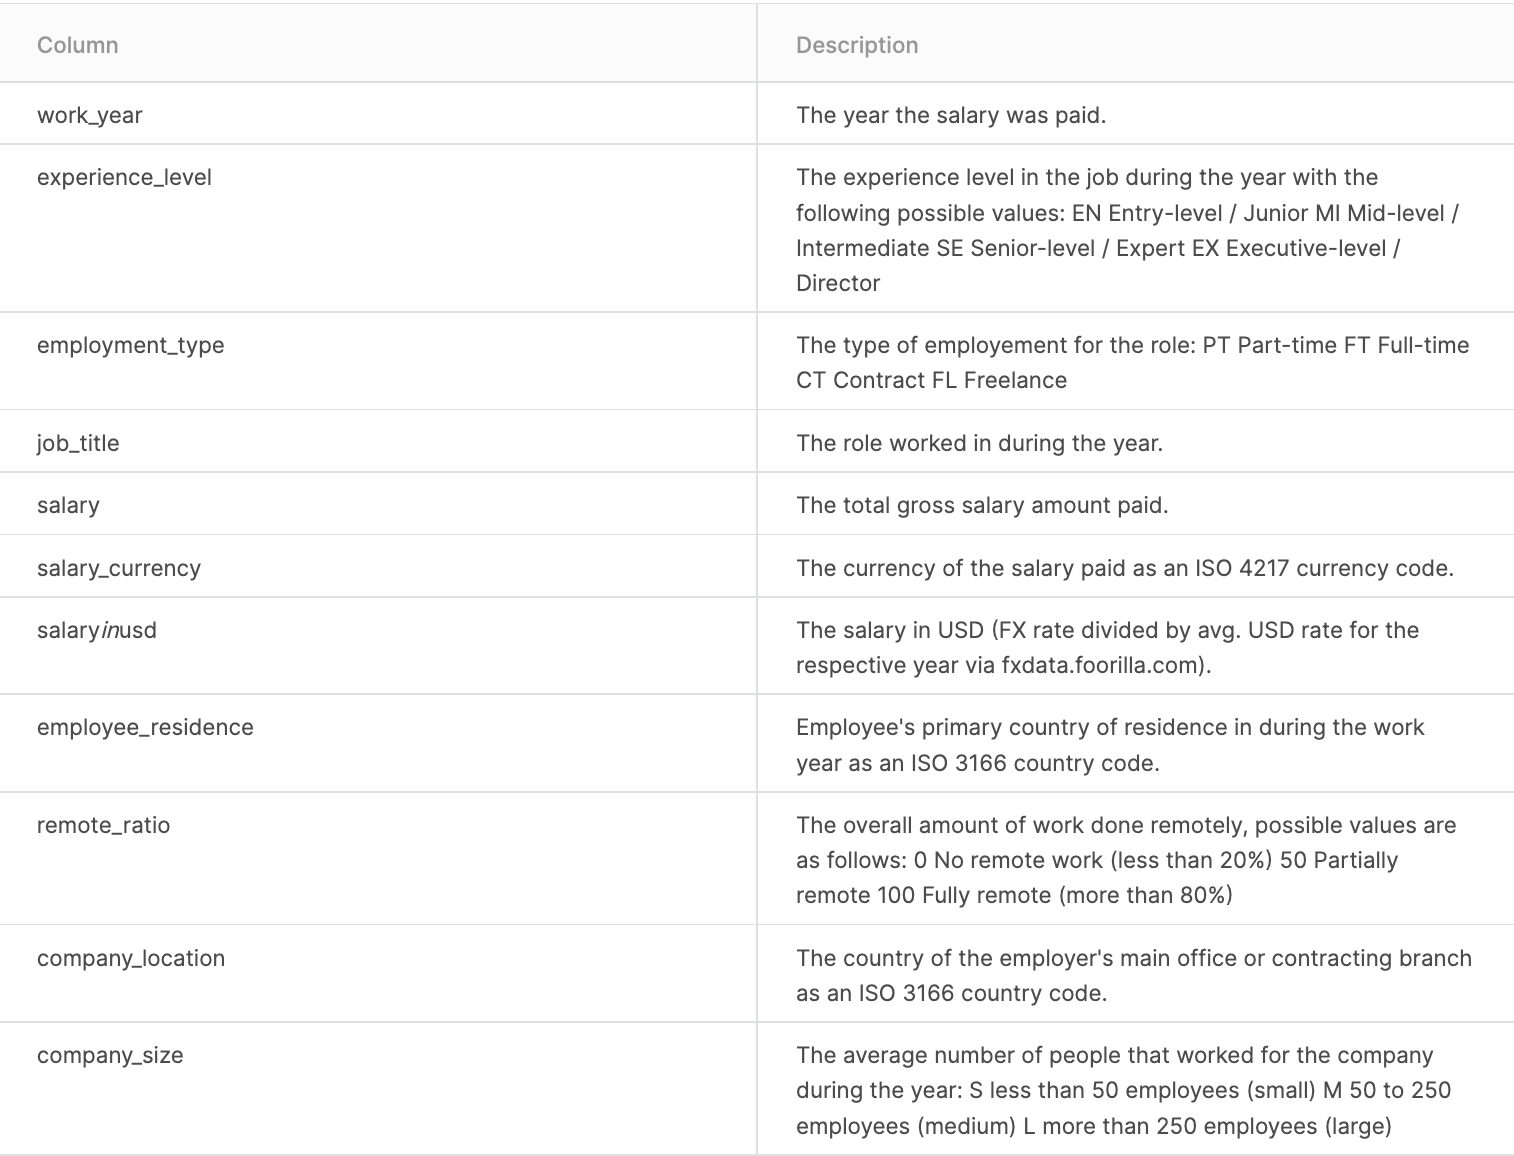

In [45]:
from IPython.display import Image
Image(filename='images/documentation.png') 

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


In [103]:
# for col in data.columns:
#     print(f"{col}:{len(data[col].unique())}")
for col in data.columns:
    print(f"{col}:{data[col].unique()}")

work_year:[2020 2021 2022]
experience_level:['MI' 'SE' 'EN' 'EX']
employment_type:['FT' 'CT' 'PT' 'FL']
job_title:['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning 

# - 1ère itération 

## Préparation de la données

In [5]:
data = data[['salary_in_usd','experience_level']]
data.head(2)

,salary_in_usd,experience_level
0,79833,MI
1,260000,SE


### Encodage de la colonne `experience_level` de manière ordinal

In [6]:
data['xp_encoded'] = data[['experience_level']].replace({'EN': 0}).replace({'MI': 1}).replace({'SE': 2}).replace({'EX': 3})



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   salary_in_usd     607 non-null    int64 
 1   experience_level  607 non-null    object
 2   xp_encoded        607 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.0+ KB


In [8]:
data = data.astype({'xp_encoded': int})

### Convertion de la colonne `salary_in_usd` en kilo $

In [9]:
data['salary_in_usd'] = data['salary_in_usd'] / 1000

data = data.astype({'salary_in_usd': int})

In [10]:
data

,salary_in_usd,experience_level,xp_encoded
0,79,MI,1
1,260,SE,2
2,109,SE,2
3,20,MI,1
4,150,SE,2
...,...,...,...
602,154,SE,2
603,126,SE,2
604,129,SE,2
605,150,SE,2


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   salary_in_usd     607 non-null    int64 
 1   experience_level  607 non-null    object
 2   xp_encoded        607 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.0+ KB


## Data visualisation

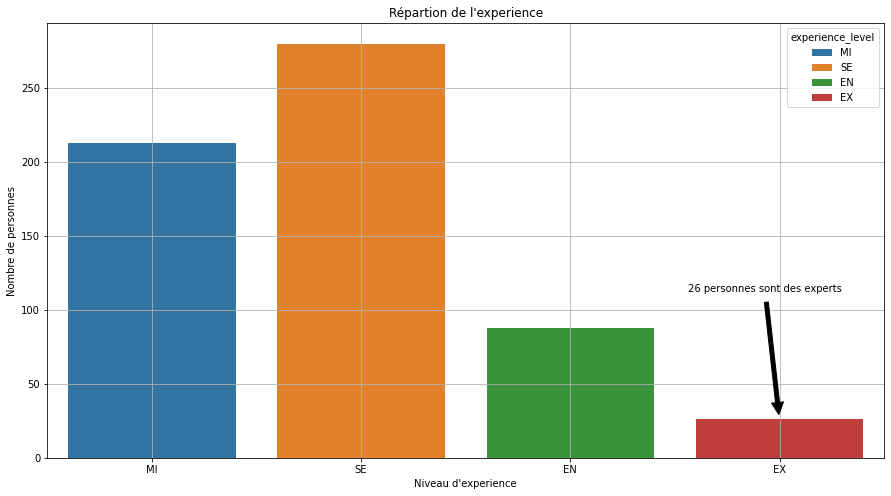

In [12]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data=data,x='experience_level', hue='experience_level',dodge=False)
ax.set_title("Répartion de l'experience")
ax.set_ylabel('Nombre de personnes')
ax.set_xlabel("Niveau d'experience")

ax.annotate('26 personnes sont des experts', xy=(3, 25),  xycoords='data',
            xytext=(0.95, 0.4), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
plt.grid(True)
plt.show()

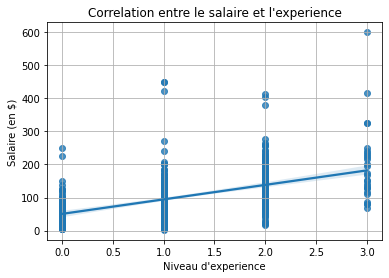

In [13]:
ax = sns.regplot(data=data,y='salary_in_usd', x='xp_encoded')
ax.set_title("Correlation entre le salaire et l'experience")
ax.set_ylabel('Salaire (en $)')
ax.set_xlabel("Niveau d'experience")
plt.grid(True)
plt.show()

**Il y a une corrélation positive entre le salaire et le niveau d'expérience**

## ML - 1ère itération

In [14]:
y = data['salary_in_usd']
X = data[['xp_encoded']]

In [15]:
#y

In [16]:
#X

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [113]:
cross_val_score(LinearRegression(),X_train,y_train, cv=5, scoring = "r2").mean()

0.18872093470172893

In [20]:
lr_1 = LinearRegression()

In [21]:
lr_1.fit(X_train,y_train)

LinearRegression()

In [22]:
lr_1.coef_

array([45.74363686])

`Interpreter : `

In [23]:
lr_1.score(X_test,y_test)

0.17677492181930476

`Interpreter : `

**Testing d'autres modèles**

In [24]:
cross_val_score(RandomForestRegressor(),X_train,y_train, cv=5).mean()

0.22231407872312275

In [25]:
cross_val_score(SVR(),X_train,y_train, cv=5).mean()

0.139946976467299

# - 2 éme itération :

## Datavisualisation

In [26]:
data_2 = pd.read_csv('data/ds_salaries.csv', index_col=0)

In [27]:
data_2_group_count = data_2.groupby('job_title',as_index=False).count()
data_2_group_count = data_2_group_count[['job_title','work_year']]

In [28]:

data_2_group_mean = data_2.groupby('job_title',as_index=False).mean()[['job_title','salary_in_usd']].sort_values(by='salary_in_usd',ascending=False)


In [29]:
data_2_group_mean['salary_in_usd'] = data_2_group_mean['salary_in_usd'] / 1000
data_2_group_mean = data_2_group_mean.astype({'salary_in_usd': int})
data_2_group_mean = data_2_group_mean.rename(columns={'salary_in_usd': 'Salaire moyen ( en kilo $ )'})

In [30]:
data_2_group_mean_count = data_2_group_mean.merge(data_2_group_count,left_on='job_title',right_on='job_title')

In [31]:
data_2_group_mean_count = data_2_group_mean_count.rename(columns={'work_year': 'Nombre de salaire'})

In [32]:
data_2_group_mean_count.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   job_title                    50 non-null     object
 1   Salaire moyen ( en kilo $ )  50 non-null     int64 
 2   Nombre de salaire            50 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [33]:
data_2_group_mean_count

,job_title,Salaire moyen ( en kilo $ ),Nombre de salaire
0,Data Analytics Lead,405,1
1,Principal Data Engineer,328,3
2,Financial Data Analyst,275,2
3,Principal Data Scientist,215,7
4,Director of Data Science,195,7
5,Data Architect,177,11
6,Applied Data Scientist,175,5
7,Analytics Engineer,175,4
8,Data Specialist,165,1
9,Head of Data,160,5


In [34]:
data_2_group_mean_count[[data_2_group_mean_count.columns[2]]]

,Nombre de salaire
0,1
1,3
2,2
3,7
4,7
5,11
6,5
7,4
8,1
9,5


In [35]:
data_2_group_mean_count

,job_title,Salaire moyen ( en kilo $ ),Nombre de salaire
0,Data Analytics Lead,405,1
1,Principal Data Engineer,328,3
2,Financial Data Analyst,275,2
3,Principal Data Scientist,215,7
4,Director of Data Science,195,7
5,Data Architect,177,11
6,Applied Data Scientist,175,5
7,Analytics Engineer,175,4
8,Data Specialist,165,1
9,Head of Data,160,5


In [36]:
data_2_group_mean_count.head(2).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   job_title                    2 non-null      object
 1   Salaire moyen ( en kilo $ )  2 non-null      int64 
 2   Nombre de salaire            2 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 64.0+ bytes


In [37]:
data_2_group_mean_count

,job_title,Salaire moyen ( en kilo $ ),Nombre de salaire
0,Data Analytics Lead,405,1
1,Principal Data Engineer,328,3
2,Financial Data Analyst,275,2
3,Principal Data Scientist,215,7
4,Director of Data Science,195,7
5,Data Architect,177,11
6,Applied Data Scientist,175,5
7,Analytics Engineer,175,4
8,Data Specialist,165,1
9,Head of Data,160,5


In [38]:
y = data_2_group_mean_count['Salaire moyen ( en kilo $ )']
x = data_2_group_mean_count['job_title']

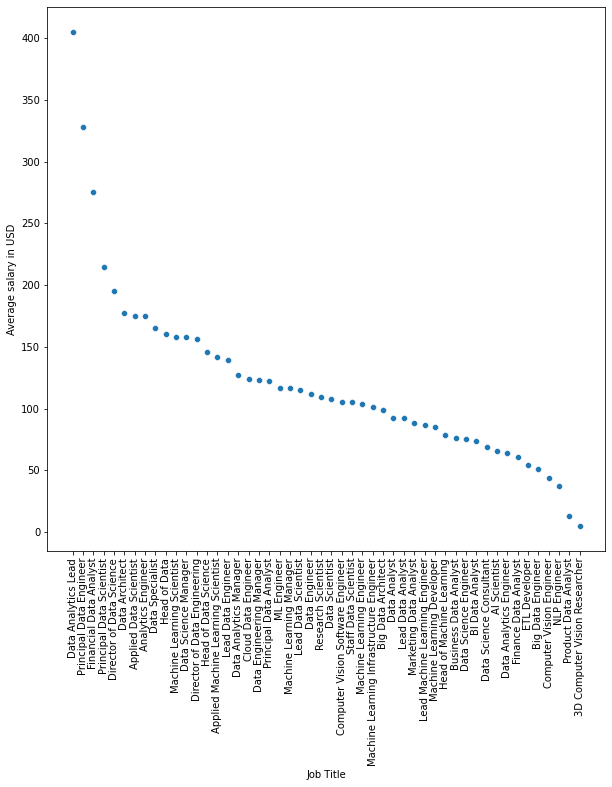

In [102]:
plt.figure(figsize=(10,10))

sns.scatterplot(x=x, y=y)

plt.xlabel('Job Title')
plt.ylabel('Average salary in USD')
plt.xticks(rotation=90)  
plt.show()

# Data visualization

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df = pd.read_csv('data/ds_salaries.csv', index_col=0)
df["salary"]=df["salary"]/1000
df["salary_in_usd"] = df["salary_in_usd"]/1000 

In [65]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [71]:
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [66]:
# Descriptive Statistics
print(df.describe())

         work_year        salary  salary_in_usd  remote_ratio
count   607.000000    607.000000     607.000000     607.00000
mean   2021.405272    324.000063     112.297870      70.92257
std       0.692133   1544.357487      70.957259      40.70913
min    2020.000000      4.000000       2.859000       0.00000
25%    2021.000000     70.000000      62.726000      50.00000
50%    2022.000000    115.000000     101.570000     100.00000
75%    2022.000000    165.000000     150.000000     100.00000
max    2022.000000  30400.000000     600.000000     100.00000


In [67]:
# Correlation Analysis
corr_matrix = df.corr()
print(corr_matrix)

               work_year    salary  salary_in_usd  remote_ratio
work_year       1.000000 -0.087577       0.170493      0.076314
salary         -0.087577  1.000000      -0.083906     -0.014608
salary_in_usd   0.170493 -0.083906       1.000000      0.132122
remote_ratio    0.076314 -0.014608       0.132122      1.000000


In [68]:
# Grouped Analysis
print(df.groupby('experience_level')['salary_in_usd'].mean())

experience_level
EN     61.643318
EX    199.392038
MI     87.996056
SE    138.617293
Name: salary_in_usd, dtype: float64


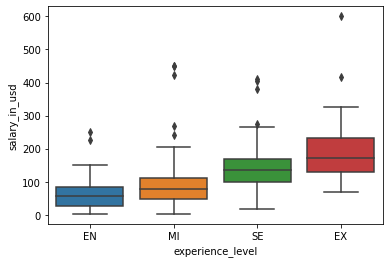

In [72]:
# Data Visualization
# Box plot Experience level & salary in usd
experience_order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=experience_order)
plt.show()

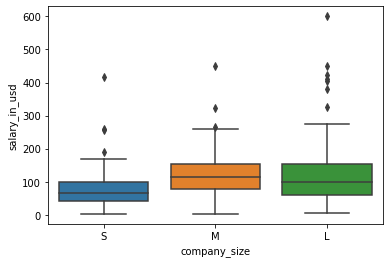

In [135]:
# Box plot Remote job & salary in usd
company_order = ['S', 'M', 'L']
sns.boxplot(x='company_size', y='salary_in_usd', data=df, order=company_order)
plt.show()

In [136]:
df["employment_type"].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

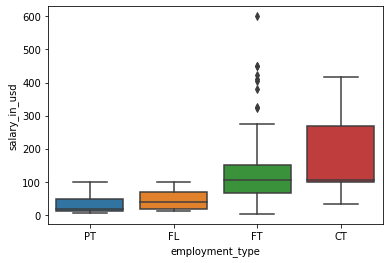

In [138]:
# Box plot Employment type  & salary in usd
employment_type_order = ['PT', 'FL', 'FT', "CT"]
sns.boxplot(x='employment_type', y='salary_in_usd', data=df, 
            order=employment_type_order)
plt.show()

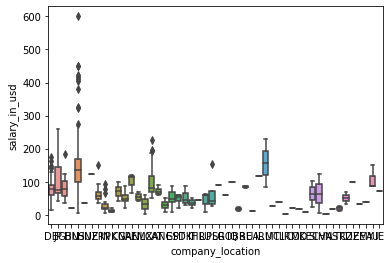

In [139]:
# Box plot Company location  & salary in usd

sns.boxplot(x='company_location', y='salary_in_usd', data=df)
plt.show()

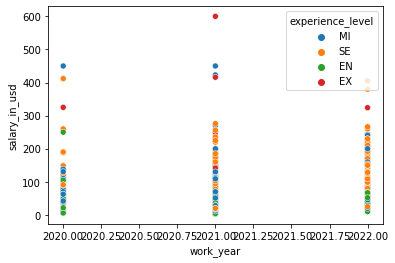

In [74]:
# Scatter plot
sns.scatterplot(x='work_year', y='salary_in_usd', hue='experience_level', data=df)
plt.show()

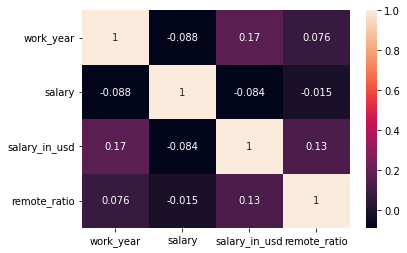

In [73]:
# Heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

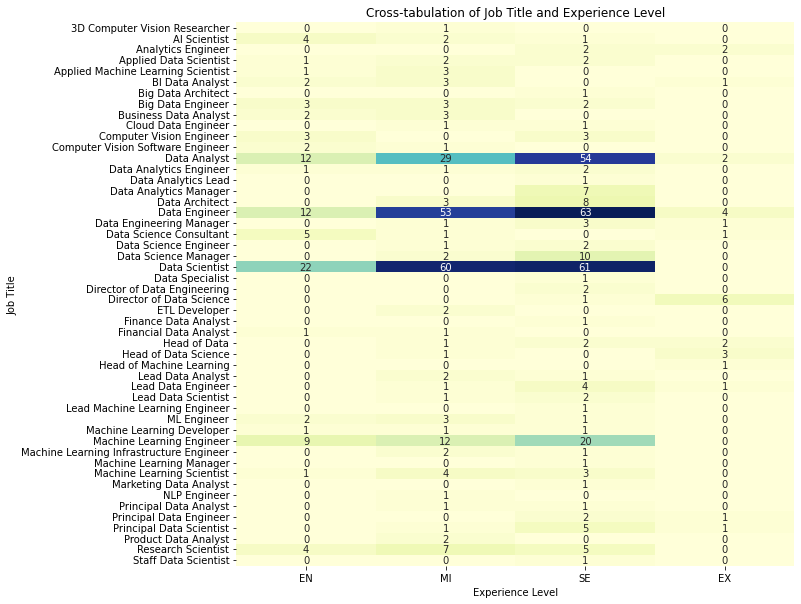

In [82]:
# Cross-tabulation of job title and experience level
cross_tab = pd.crosstab(df['job_title'], df['experience_level'])
experience_order = ['EN', 'MI', 'SE', 'EX']
cross_tab_reodered = cross_tab[experience_order]
# Use seaborn to create a heatmap
plt.figure(figsize=(10,10)) 
sns.heatmap(cross_tab_reodered, annot=True, cmap="YlGnBu", cbar=False)

plt.title('Cross-tabulation of Job Title and Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Job Title')
plt.show()

In [84]:
df["remote_ratio"].unique()

array([  0,  50, 100])

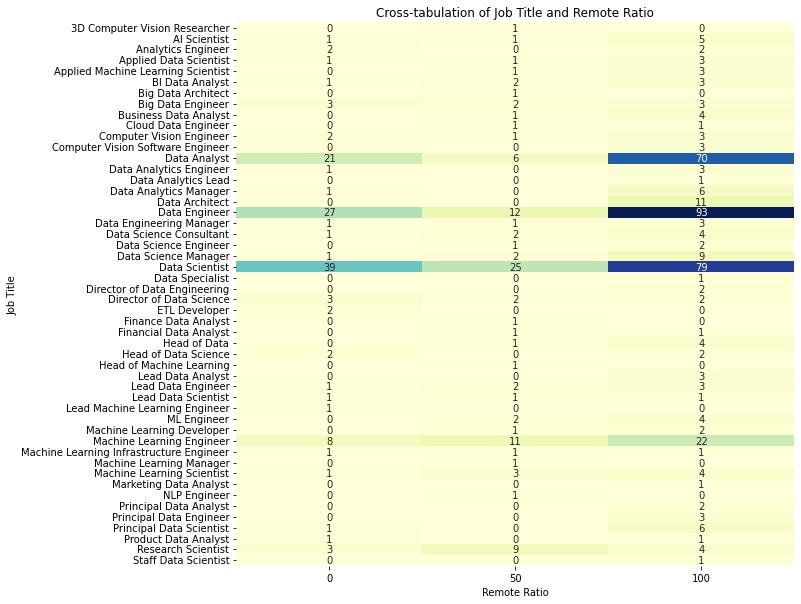

In [98]:
# Cross-tabulation of job title and remote ratio 
cross_tab = pd.crosstab(df['job_title'], df['remote_ratio'])
remote_ratio_order = [0,  50, 100]
cross_tab_reodered = cross_tab[remote_ratio_order]
plt.figure(figsize=(10,10))
sns.heatmap(cross_tab_reodered, annot=True, cmap="YlGnBu", cbar=False)

plt.title('Cross-tabulation of Job Title and Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Job Title')
plt.show()

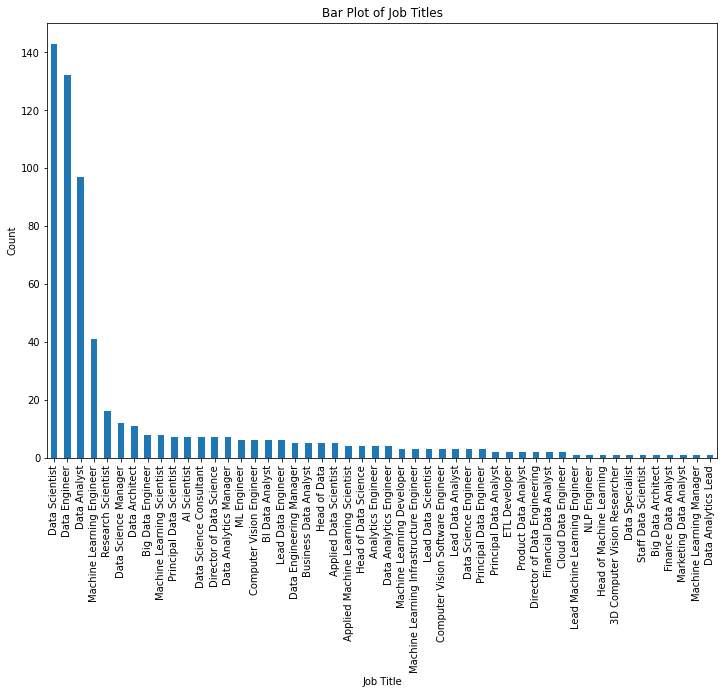

In [87]:
# Count the frequency of each job title
job_title_counts = df['job_title'].value_counts()

# Create a bar plot of the counts
plt.figure(figsize=(12, 8))  # adjust as needed
job_title_counts.plot(kind='bar')
plt.title('Bar Plot of Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=90)  # rotates x-axis labels for better readability
plt.show()

In [88]:
df["experience_level"].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

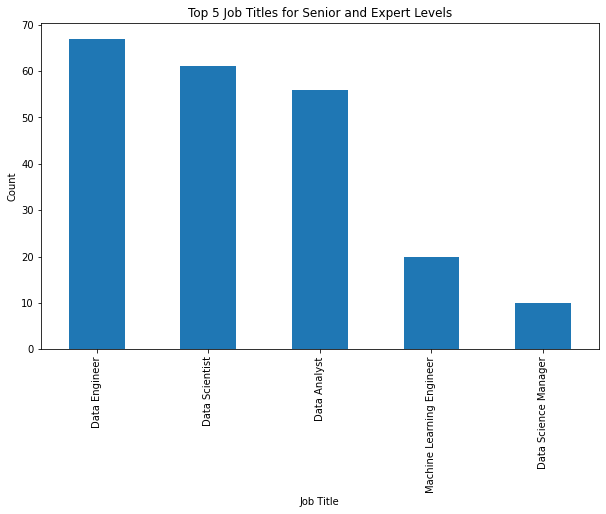

In [90]:
# Filter DataFrame to include only 'senior' and 'expert' levels
senior_expert_df = df[df['experience_level'].isin(['SE', 'EX'])]

# Count the frequency of each job title
job_title_counts = senior_expert_df['job_title'].value_counts()

# Get the top 5 job titles
top_5_job_titles = job_title_counts[:5]

# Create a bar plot of the counts
plt.figure(figsize=(10, 6))  # adjust as needed
top_5_job_titles.plot(kind='bar')
plt.title('Top 5 Job Titles for Senior and Expert Levels')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

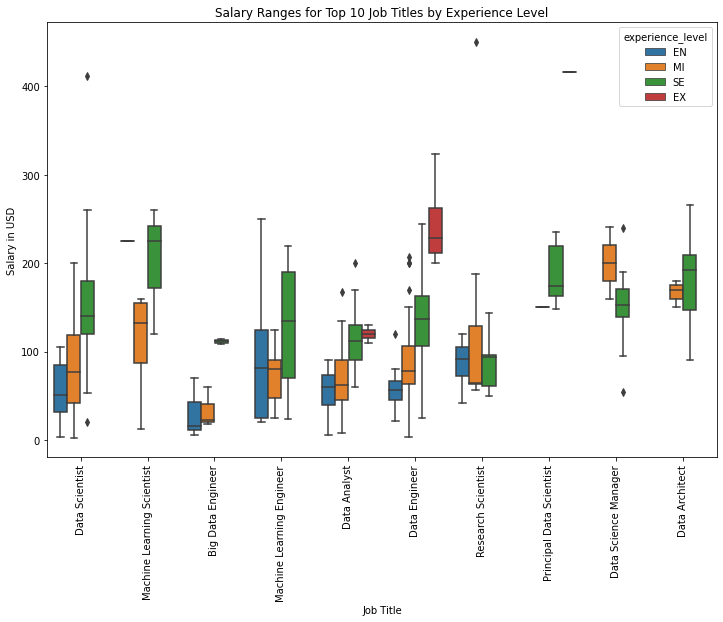

In [95]:
# Range of the salary in USD for Top 10 job titles

# Get the top 10 job titles
top_10_job_titles = df['job_title'].value_counts().index[:10]

# Filter the DataFrame to include only the top 10 job titles
filtered_df = df[df['job_title'].isin(top_10_job_titles)]

# Create a boxplot of salaries for each job title, with different colors for each experience level
plt.figure(figsize=(12, 8))  # adjust as needed
sns.boxplot(x='job_title', y='salary_in_usd', hue='experience_level', data=filtered_df, hue_order=experience_order)
plt.title('Salary Ranges for Top 10 Job Titles by Experience Level')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)  # rotates x-axis labels for better readability
plt.show()

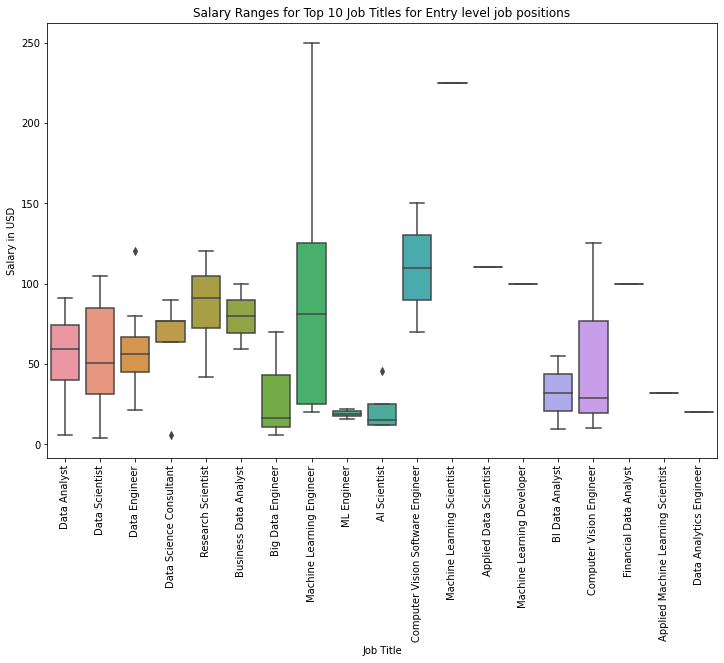

In [97]:
# Filter the DataFrame to include only the top entry level jobs
filtered_df = df[df['experience_level'].isin(["EN"])]

# Create a boxplot of salaries for each job title, with different colors for each experience level
plt.figure(figsize=(12, 8))  # adjust as needed
sns.boxplot(x='job_title', y='salary_in_usd', data=filtered_df)
plt.title('Salary Ranges for Top 10 Job Titles for Entry level job positions')
plt.xlabel('Job Title')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)  # rotates x-axis labels for better readability
plt.show()

In [129]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

# Modeling (improvement)
## Create a model base on experience_level, company and employment type

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

feature_columns = ['experience_level', 'employment_type', "company_size" ]
target_column = 'salary_in_usd'

# One-hot encoding for categorical features
encoder = OneHotEncoder(sparse=False)#, handle_unknown='ignore')
encoded_features = encoder.fit_transform(df[feature_columns])

# Create a DataFrame from the encoded features with the appropriate column names
encoded_df = pd.DataFrame(
    encoded_features,
    columns=encoder.get_feature_names_out(feature_columns)
)

# Add the target column to the DataFrame
encoded_df[target_column] = df[target_column]

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    encoded_df.drop(target_column, axis=1),  # features
    encoded_df[target_column],  # target
    test_size=0.2,
    random_state=0
)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")


Root Mean Squared Error: 68.42426544362752
R2 score: 0.2673133789753457


In [157]:
feature_columns = ['experience_level', 'employment_type', "company_size" ]

# Define the encoder for experience_level and employment_type
ordinal_encoder = OrdinalEncoder(categories=[['EN', 'MI', 'SE', 'EX'], ['PT', 'FL', 'FT', 'CT']])

# Define the encoder for company_location
one_hot_encoder = OneHotEncoder(sparse=False)

# Define the preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ["experience_level", "employment_type"]),
        ('onehot', one_hot_encoder, ["company_size"])
    ])

# Add the target column to the DataFrame
df_preprocessed = preprocessor.fit_transform(df[feature_columns])
# df_preprocessed[target_column] = df[target_column]


# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    df_preprocessed,  # features
    df[target_column],  # target
    test_size=0.2,
    random_state=0
)

# Define the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict the target for the test set
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")


Root Mean Squared Error: 68.03174098024597
R2 score: 0.2756955662408731


### Learning curve

In [149]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, cv=5)

# Calculate the average scores across all folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

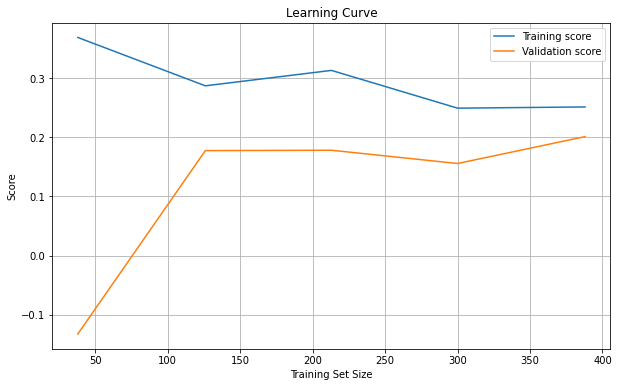

In [150]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, validation_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')

plt.legend(loc='best')
plt.grid()
plt.show()

# Model based on experience, company size and location and year

In [160]:
#Use label encoding to convert cat to numbers

data = df

data['work_year']=data['work_year'].astype('category')
data['experience_level']=data['experience_level'].astype('category')
data['employment_type']=data['employment_type'].astype('category')
data['job_title']=data['job_title'].astype('category')
data['remote_ratio']=data['remote_ratio'].astype('category')
data['company_location']=data['company_location'].astype('category')
data['company_size']=data['company_size'].astype('category')
data['employee_residence']=data['employee_residence'].astype('category')


#label encoding
data['work_year']=data['work_year'].cat.codes
data['experience_level']=data['experience_level'].cat.codes
data['employment_type']=data['employment_type'].cat.codes
data['job_title']=data['job_title'].cat.codes
data['remote_ratio']=data['remote_ratio'].cat.codes
data['company_location']=data['company_location'].cat.codes
data['company_size']=data['company_size'].cat.codes
data['employee_residence']=data['employee_residence'].cat.codes


corr=data.corr()
corr.style.background_gradient(cmap='coolwarm')

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.428994,0.897704,0.169083,1.000000,-0.066554
company_size,0.078764,-0.066423,0.034549,-0.031011,-0.079959,-0.151205,-0.081742,0.022070,-0.066554,1.000000


In [168]:
#Remove outliers from the target column
#calculating the three quartiles
Q1 = np.percentile(data["salary_in_usd"], 25, interpolation = 'midpoint')
Q2 = np.percentile(data["salary_in_usd"], 50, interpolation = 'midpoint')  
Q3 = np.percentile(data["salary_in_usd"], 75, interpolation = 'midpoint')
IQR = Q3 - Q1 #calculating inter-quartile range
print('Interquartile range is', IQR)
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR
print('low_limit is', low_lim)
print('up_limit is', up_lim)
outlier =[]
for x in data["salary_in_usd"]:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print(' outlier in the dataset is', outlier) #printing outliers

Interquartile range is 85.612
low_limit is -65.769
up_limit is 276.679
 outlier in the dataset is []


/tmp/ipykernel_279747/2138669691.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data["salary_in_usd"], 25, interpolation = 'midpoint')
/tmp/ipykernel_279747/2138669691.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data["salary_in_usd"], 50, interpolation = 'midpoint')
/tmp/ipykernel_279747/2138669691.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Depreca

In [169]:
data.drop(data[data['salary_in_usd'] >= 324.].index, inplace = True) #dropping outliers

In [174]:
feature_columns = ['experience_level','company_location','work_year','company_size']


X_train, X_test, y_train, y_test = train_test_split(
    data[feature_columns] , 
    data[target_column],  
    test_size=0.2,
    random_state=0
)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate the root mean squared error of the predictions
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f"R2 score: {r2}")


Root Mean Squared Error: 55.615702760902536
R2 score: 0.2774036686567066


In [171]:
print(model.intercept_)
print(model.coef_)

22.239898612180127
[ 14.4004535    1.18967254  13.66352841 -12.5383992 ]


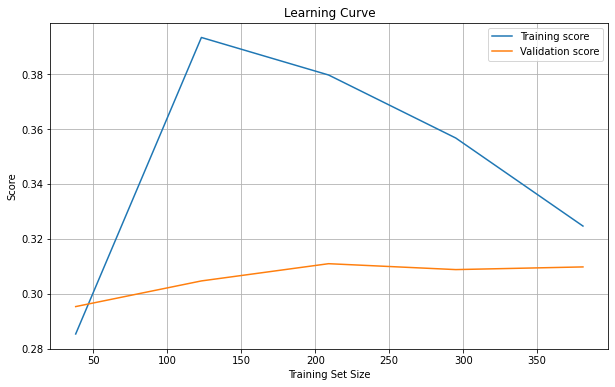

In [173]:
# Generate learning curve data
train_sizes, train_scores, validation_scores = learning_curve(
    model, X_train, y_train, cv=5)

# Calculate the average scores across all folds
train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, validation_scores_mean, label='Validation score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')

plt.legend(loc='best')
plt.grid()
plt.show()